## Thông tin sinh viên:
- Họ và tên: Chung Hoàng Tuấn Kiệt
- MSSV: 19120553
- Lớp: CNTN19

## Import library

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## Read Data

### Read file

In [277]:
# Read data_cntn19.csv file
df = pd.read_excel("../Data/data_cntn19.xlsx") 

In [278]:
print(df.head())

  ImmunoPhenotype  sum_frameshift_expression  max_frameshift_expression  \
0          Desert                  65.052090                   37.23766   
1          Desert                 124.985740                   33.15245   
2          Desert                 140.991170                   36.67102   
3          Desert                 276.583909                   35.75460   
4          Desert                 222.826690                   33.69304   

         PFS  
0   1.971253  
1   5.716632  
2  11.827515  
3   0.032854  
4   7.490760  


### Split Into Column

In [279]:
# Split data  into main column
ImunoType = df["ImmunoPhenotype"]
SumFrameExp = df["sum_frameshift_expression"]
MaxFrameExp = df["max_frameshift_expression"]
PFS =df["PFS"]

### Column To Vector

In [280]:
# Transform column to vector
x1 = np.array(ImunoType).reshape(-1,1)
x2 = np.array([SumFrameExp]).reshape(-1,1)
x3 = np.array([MaxFrameExp]).reshape(-1,1)
x2_3 =  np.concatenate((x2, x3), axis=1)
y = np.array([PFS]).reshape(-1,1)

## Visualization

### Function

In [281]:
# Visualize value after predict
def visualize(X_, Y_, Y_predict, X_name,Y_name, title):
   plt.scatter(X_, Y_, color = 'blue')
   plt.title(title)
   plt.plot(X_,Y_predict, color = 'red')
   plt.xlabel(X_name)
   plt.ylabel(Y_name)
   plt.show()

### Type To Label

In [282]:
X_LABEL_NUM = [0]*len(x1[x1=="Desert"]) + [1]*len(x1[x1=="Excluded"]) + [2]*len(x1[x1=="Infiltrated"]) +\
   [3]*len(x1[x1=="No_IF"])

In [283]:
X_LABEL = ["Desert", "Excluded", "Infiltrated", "No_IF"]

### Plot Data

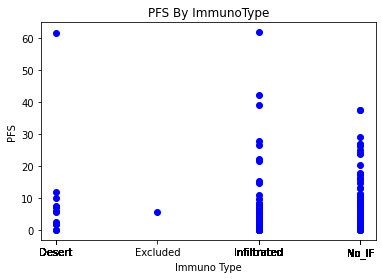

In [284]:
# Plot data for each of type
plt.scatter(X_LABEL_NUM, y, color = 'blue')
plt.title('PFS By ImmunoType')
plt.xticks(X_LABEL_NUM, np.array([label[0] for label in x1]))
plt.xlabel('Immuno Type')
plt.ylabel('PFS')
plt.show()

<AxesSubplot:>

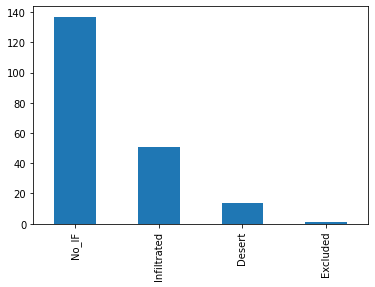

In [285]:
# Count value for each type
df['ImmunoPhenotype'].value_counts().plot(kind='bar')

In [286]:
df.corr()

,sum_frameshift_expression,max_frameshift_expression,PFS
sum_frameshift_expression,1.000000,0.410856,-0.059118
max_frameshift_expression,0.410856,1.000000,-0.145873
PFS,-0.059118,-0.145873,1.000000


## Linear Regression

In [287]:
# Init model
linearModel = LinearRegression()

### Sum FrameShift Expression

In [288]:
# Linear Regression With Sum FrameShift Expression
SumModel = linearModel.fit(x2,y)
PredictValue = linearModel.predict(x2)

In [289]:
# Coefficent
SumModel.coef_

array([[-0.00441277]])

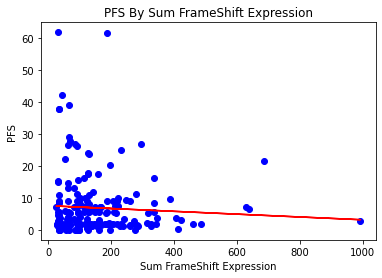

In [290]:
# Visualize Result
visualize(x2, y, PredictValue, 'Sum FrameShift Expression','PFS',\
   'PFS By Sum FrameShift Expression')

In [291]:
# Score of model
SumModel.score(x2, y)

0.003494974195084821

### Max FrameShift Expression

In [292]:
# Linear Regression With Max FrameShift Expression
MaxModel = linearModel.fit(x3,y)
PredictValue = linearModel.predict(x3)

In [293]:
# Coefficent
MaxModel.coef_

array([[-0.58795704]])

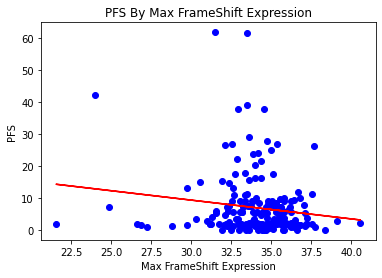

In [294]:
# Visualize Result
visualize(x3, y, PredictValue, 'Max FrameShift Expression','PFS',\
   'PFS By Max FrameShift Expression')

In [295]:
# Score
MaxModel.score(x3, y)

0.02127897176627258

### Sum And Max FrameShift Expression

In [296]:
# Linear Regression With Sum And Max FrameShift Expression
SumAndMaxModel = linearModel.fit(x2_3,y)
PredictValue = linearModel.predict(x2_3)

In [297]:
# Coefficent
SumAndMaxModel.coef_

array([[ 7.31494089e-05, -5.89579906e-01]])

## Linear Regression For Each Type

### Desert And Excluded

In [298]:
# Desert Data
X_Desert = [x2_3[i] for i in range(len(x1)) if x1[i]=="Desert"]
Y_Desert = [y[i] for i in range(len(x1)) if x1[i]=="Desert"]

In [299]:
# Desert Model
desertModel = linearModel.fit(X_Desert, Y_Desert)

Score = desertModel.score(X_Desert, Y_Desert)

print("Score in case Desert: ", Score)

Score in case Desert:  0.12184882807597375


### Infiltrated

In [300]:
# Infiltrated Data
X_Infiltrated = [x2_3[i] for i in range(len(x1)) if x1[i]=="Infiltrated"]
Y_Infiltrated = [y[i] for i in range(len(x1)) if x1[i]=="Infiltrated"]

In [301]:
# Infiltrated Model
infiltratedModel = linearModel.fit(X_Infiltrated, Y_Infiltrated)

Score = infiltratedModel.score(X_Infiltrated, Y_Infiltrated)

print("Score in case Infiltrated: ", Score)

Score in case Infiltrated:  0.2822465397127508


### No_IF

In [302]:
# No IF Data
X_No_IF = [x2_3[i] for i in range(len(x1)) if x1[i]=="No_IF"]
Y_No_IF = [y[i] for i in range(len(x1)) if x1[i]=="No_IF"]

In [303]:
# No IF Model
noIFModel = linearModel.fit(X_No_IF, Y_No_IF)

Score = noIFModel.score(X_No_IF, Y_No_IF)

print("Score in case Desert: ", Score)

Score in case Desert:  0.004331448531450843


## Random Forest Regressor

### Add New Column

Tạo các cột mới với:
- Desert: Dòng hiện tại thuộc type Desert thì sẽ mang giá trị 1, ngược lại 0
- Infiltrated: Dòng hiện tại thuộc type Infiltrated thì sẽ mang giá trị 1, ngược lại 0
- No_IF: Dòng hiện tại thuộc type No_IF thì sẽ mang giá trị 1, ngược lại 0

In [304]:
# Tạo cột
Desert = x1=="Desert"
Infiltrated = x1=="Infiltrated"
No_IF = x1=="No_IF"

In [305]:
# Đổi giá trị
Desert = [1 if value else 0 for value in Desert]
Infiltrated = [1 if value else 0 for value in Infiltrated]
No_IF = [1 if value else 0 for value in No_IF]

In [306]:
# Thêm cột
df["Desert"] = Desert
df["Infiltrated"] = Infiltrated
df["No_IF"] = No_IF

In [307]:
df

,ImmunoPhenotype,sum_frameshift_expression,max_frameshift_expression,PFS,Desert,Infiltrated,No_IF
0,Desert,65.052090,37.23766,1.971253,1,0,0
1,Desert,124.985740,33.15245,5.716632,1,0,0
2,Desert,140.991170,36.67102,11.827515,1,0,0
3,Desert,276.583909,35.75460,0.032854,1,0,0
4,Desert,222.826690,33.69304,7.490760,1,0,0
...,...,...,...,...,...,...,...
198,No_IF,258.997350,37.08511,1.216438,0,0,1
199,No_IF,139.206440,32.59091,1.347945,0,0,1
200,No_IF,32.050800,32.05080,1.446575,0,0,1
201,No_IF,149.363077,33.14751,5.654795,0,0,1


### Random Forest

In [308]:
# hyper Parameters
max_depth = 2
random_state = 80
n_estimators = 80

In [309]:
# Init Model
RandomForestModel = RandomForestRegressor(max_depth=max_depth, random_state=random_state,
                            n_estimators=n_estimators)

In [310]:
# Init Data
X_train = df[['sum_frameshift_expression', 'max_frameshift_expression', 
           'Desert', 
           'Infiltrated', 'No_IF']]
Y_train = y

In [311]:
# Training
RandomForestModel.fit(X_train, Y_train)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_32880\994383954.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train, Y_train)


RandomForestRegressor(max_depth=2, n_estimators=80, random_state=80)

In [312]:
# Predict And Score
PredictValue = pd.Series(RandomForestModel.predict(X_train), index=X_train.index)
MSE = mean_squared_error(Y_train, PredictValue)
RMSE = np.sqrt(MSE)

print('Root Mean Squared Error (RMSE): ', RMSE)

print('R2 score: ', r2_score(Y_train, PredictValue))

Root Mean Squared Error (RMSE):  8.594252476566858
R2 score:  0.1888386773458297


In [313]:
# Feature importance 
print(RandomForestModel.feature_importances_)

[0.38227523 0.50880324 0.01084891 0.04883971 0.04923292]


### Score Function

In [314]:
# Score Function
def R2ScoreOfModel(X_train, Y_train, n_estimators, max_depth, random_state):
  R2Avarage = 0
  for i in range(n_estimators):
    RandomForestModel = RandomForestRegressor(max_depth=max_depth, random_state=random_state, \
                                n_estimators=n_estimators)
    RandomForestModel.fit(X_train, Y_train)
    PredictValue = pd.Series(RandomForestModel.predict(X_train), index=X_train.index)
    R2Avarage += r2_score(Y_train, PredictValue)
  return R2Avarage/n_estimators

In [315]:
R2Score = R2ScoreOfModel(X_train, Y_train, n_estimators, max_depth, random_state)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_32880\1365814153.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train, Y_train)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_32880\1365814153.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train, Y_train)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_32880\1365814153.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train, Y_train)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_32880\1365814153.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

In [316]:
print('R2 score: ', R2Score)

R2 score:  0.1888386773458297
